### Import Libraries

In [1]:
import json
import cv2
import matplotlib.pyplot as plt
import pandas as pd

annotation_file = 'train_quadrant_enumeration_disease.json'

### Read the annotations file

In [2]:
with open(annotation_file, "r") as json_file:
    config = json.load(json_file)

In [4]:
config.keys()

dict_keys(['images', 'annotations', 'categories_1', 'categories_2', 'categories_3'])

In [7]:
[i for i in config['images'] if i['file_name'] == 'train_0.png']

[{'height': 1316, 'width': 2850, 'id': 57, 'file_name': 'train_0.png'}]

### DataFrames for config parts

In [10]:
images_df = pd.DataFrame(config['images'])
images_df

,height,width,id,file_name
0,1316,2744,1,train_673.png
1,1504,2872,2,train_283.png
2,1316,2909,3,train_435.png
3,1504,2872,4,train_95.png
4,1504,2872,5,train_475.png
...,...,...,...,...
700,1316,2910,701,train_338.png
701,1316,2851,702,train_657.png
702,1316,2850,703,train_344.png
703,1504,2872,704,train_599.png


In [32]:
annotations = pd.DataFrame(config['annotations'])
annotations

,iscrowd,image_id,bbox,segmentation,id,area,category_id_1,category_id_2,category_id_3
0,0,1,"[542.0, 698.0, 220.0, 271.0]","[[621, 703, 573, 744, 542, 885, 580, 945, 650,...",1,39683,3,7,0
1,0,1,"[1952.0, 693.0, 177.0, 270.0]","[[2045, 693, 2109, 734, 2129, 915, 2047, 963, ...",2,33301,2,7,0
2,0,1,"[675.0, 708.0, 243.0, 300.0]","[[784, 711, 754, 746, 737, 821, 678, 916, 675,...",3,45758,3,6,1
3,0,1,"[1463.0, 725.0, 98.0, 425.0]","[[1464, 749, 1513, 725, 1550, 760, 1555, 798, ...",4,30985,2,2,1
4,0,1,"[1536.0, 753.0, 103.0, 381.0]","[[1543, 796, 1590, 753, 1622, 796, 1629, 840, ...",5,28044,2,3,1
...,...,...,...,...,...,...,...,...,...
3524,0,705,"[1851.2857142857142, 474.2857142857142, 117.14...","[[1885, 477, 1868, 597, 1859, 657, 1851, 728, ...",3525,28938,1,5,1
3525,0,705,"[1959.0, 479.9999999999999, 127.0, 274.2857142...","[[2005, 488, 1974, 479, 1965, 522, 1965, 588, ...",3526,23181,1,6,1
3526,0,705,"[2024.9999999999998, 463.0, 147.00000000000023...","[[2064, 463, 2024, 471, 2036, 559, 2056, 628, ...",3527,20023,1,7,3
3527,0,705,"[1921.7142857142856, 749.0, 221.28571428571445...","[[1942, 783, 1924, 806, 1921, 835, 1944, 872, ...",3528,32824,2,6,1


In [14]:
config['categories_1']

[{'id': 0, 'name': '1', 'supercategory': '1'},
 {'id': 1, 'name': '2', 'supercategory': '2'},
 {'id': 2, 'name': '3', 'supercategory': '3'},
 {'id': 3, 'name': '4', 'supercategory': '4'}]

In [13]:
config['categories_2']

[{'id': 0, 'name': '1', 'supercategory': '1'},
 {'id': 1, 'name': '2', 'supercategory': '2'},
 {'id': 2, 'name': '3', 'supercategory': '3'},
 {'id': 3, 'name': '4', 'supercategory': '4'},
 {'id': 4, 'name': '5', 'supercategory': '5'},
 {'id': 5, 'name': '6', 'supercategory': '6'},
 {'id': 6, 'name': '7', 'supercategory': '7'},
 {'id': 7, 'name': '8', 'supercategory': '8'}]

In [26]:
disease_label = {}
for i in config['categories_3']:
    disease_label[i['id']] = i['name'] 
    
disease_label

{0: 'Impacted', 1: 'Caries', 2: 'Periapical Lesion', 3: 'Deep Caries'}

### Obtain results for train_0.png

In [33]:
res = images_df[images_df['file_name'] == 'train_0.png']
image_id = res['id'].to_list()[0]
image_id

57

In [34]:
res = annotations[annotations['id'] == image_id]
res

,iscrowd,image_id,bbox,segmentation,id,area,category_id_1,category_id_2,category_id_3
56,0,9,"[831.7460317460317, 426.984126984127, 233.3333...","[[857, 479, 839, 511, 831, 558, 887, 595, 925,...",57,26754,0,7,0


In [35]:
temp = res.copy()
temp['category_id_3'] = res['category_id_3'].map(disease_label)
temp

,iscrowd,image_id,bbox,segmentation,id,area,category_id_1,category_id_2,category_id_3
56,0,9,"[831.7460317460317, 426.984126984127, 233.3333...","[[857, 479, 839, 511, 831, 558, 887, 595, 925,...",57,26754,0,7,Impacted


In [72]:
temp['bbox'].to_list()[0]

[831.7460317460317, 426.984126984127, 233.33333333333337, 171.42857142857144]

In [78]:
temp['bbox_int']

56    [831, 426, 233, 171]
Name: bbox_int, dtype: object

### YOLOv8 format

In [37]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')

response = model.predict('train_0.png')


image 1/1 C:\Users\islam\Diploma\train_0.png: 320x640 1 person, 205.0ms
Speed: 4.0ms preprocess, 205.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 640)


In [40]:
response[0].boxes.data

tensor([[6.5990e+01, 1.3040e+01, 2.7121e+03, 1.2804e+03, 8.3872e-01, 0.0000e+00]])

### Transform to YOLOv8 format
x,y,w,h,probs,cls

In [56]:
temp[['category_id_1', 'category_id_2', 'category_id_3']].T[56].to_list()

[0, 7, 'Impacted']

In [79]:
yolov8_format = []

def change_to_yolo(temp: pd.DataFrame):
    yolov8_format.extend(temp['bbox'].to_list()[0])
    yolov8_format.append(1)
    yolov8_format.append(temp['category_id_3'].to_list()[0])
    
    return yolov8_format
    
change_to_yolo(temp)

[831.7460317460317,
 426.984126984127,
 233.33333333333337,
 171.42857142857144,
 1,
 'Impacted']

In [80]:
yolov8_format

[831.7460317460317,
 426.984126984127,
 233.33333333333337,
 171.42857142857144,
 1,
 'Impacted']

### Bounding Boxes on test image

In [64]:
yolov8_format[0:2]

[831.7460317460317, 426.984126984127]

In [84]:
int(yolov8_format[3])

171

In [85]:
yolov8_format[-1]

'Impacted'

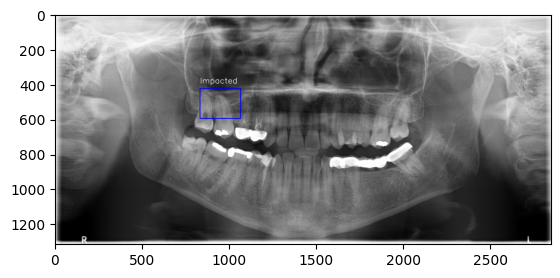

In [93]:
img = cv2.imread('train_0.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.rectangle(img, (int(yolov8_format[0]), int(yolov8_format[1])) ,(int(yolov8_format[2])+int(yolov8_format[0]), int(yolov8_format[3])+int(yolov8_format[1])), (0,0,255), 3)

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1.5
font_color = (255, 255, 255)  # White color in BGR
thickness = 2

cv2.putText(img, yolov8_format[-1], (int(yolov8_format[0]), int(yolov8_format[1])-30), font, font_scale, font_color, thickness)

plt.imshow(img)